In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [26]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=4)

iris_data=load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

In [27]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

In [28]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,\
               feature_names=iris_data.feature_names, impurity=True, filled=True)

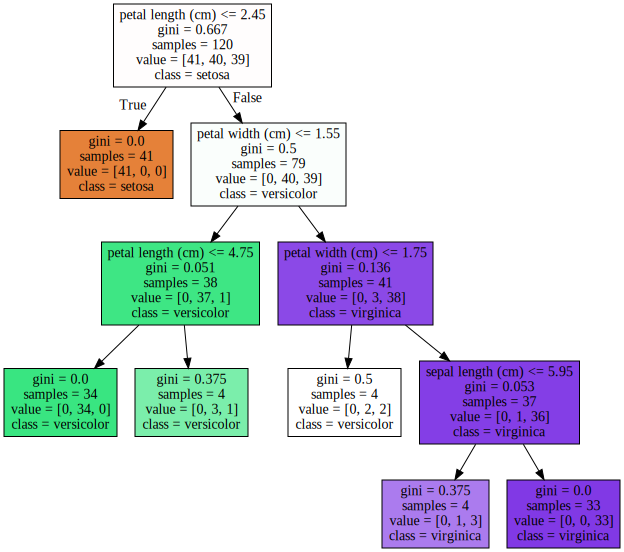

In [29]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [30]:
import seaborn as sns
%matplotlib inline

In [31]:
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

Feature importances:
[0.006 0.    0.546 0.448]


In [32]:
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sepal length (cm) : 0.006
sepal width (cm) : 0.000
petal length (cm) : 0.546
petal width (cm) : 0.448


<AxesSubplot:>

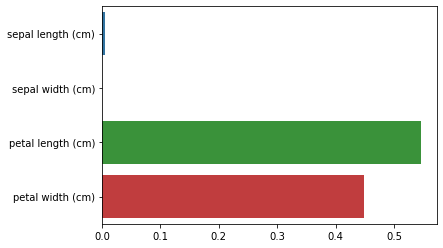

In [34]:
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)